In [4]:
import pandas as pd
# Import the data from both tabs in the "Bank_Churn_Messy" Excel file
account_info = pd.read_excel('/Users/deepali/Desktop/Github Projects /Bank+Customer+Churn/Bank_Churn_Messy.xlsx')
customer_info = pd.read_excel('/Users/deepali/Desktop/Github Projects /Bank+Customer+Churn/Bank_Churn_Messy.xlsx', sheet_name = 1)

In [5]:
# Joining "Account_Info" to "Customer_Info" using the CustomerID column
churn_data = account_info.merge(customer_info, how = 'left', on = 'CustomerId')

In [6]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [7]:
# Since Tenure_x and Tenure_y have identical columns, we will drop it
# Also, rename Tenure_x to tenure

churn_data = churn_data.drop('Tenure_y', axis = 1).rename({'Tenure_x':'Tenure'},axis = 1)

In [8]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0


In [9]:
churn_data.shape

(10004, 13)

In [10]:
# Check duplicate values
churn_data.duplicated(keep = False)
#keep = False will display all duplicate values;keep = 'first' wil display first duplicate occurence; keep = 'last' wil display first duplicate occurence

0         True
1         True
2        False
3        False
4        False
         ...  
9999     False
10000     True
10001     True
10002     True
10003     True
Length: 10004, dtype: bool

In [11]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0


In [12]:
# Remove duplicate rows and columns 
churn_data = churn_data.drop_duplicates(keep = False)
# keep = False will drop all duplicates - the 1st occurence and the last occurence

In [13]:
churn_data.shape

(9998, 13)

In [14]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 2 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9998 non-null   int64  
 1   Surname          9995 non-null   object 
 2   CreditScore      9998 non-null   int64  
 3   Geography        9998 non-null   object 
 4   Gender           9998 non-null   object 
 5   Age              9995 non-null   float64
 6   Tenure           9998 non-null   int64  
 7   EstimatedSalary  9998 non-null   object 
 8   Balance          9998 non-null   object 
 9   NumOfProducts    9998 non-null   int64  
 10  HasCrCard        9998 non-null   object 
 11  IsActiveMember   9998 non-null   object 
 12  Exited           9998 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


In [15]:
churn_data.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1


In [16]:
# Replace € with ''
churn_data['EstimatedSalary'] = churn_data['EstimatedSalary'].str.replace('€', '')
churn_data['Balance'] = churn_data['Balance'].str.replace('€', '')

In [17]:
churn_data.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.8,3,No,No,1


In [18]:
# Check the data types for each column and make any necessary fixes
churn_data.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
EstimatedSalary     object
Balance             object
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
Exited               int64
dtype: object

In [19]:
# Convert data 
churn_data['EstimatedSalary'] = churn_data['EstimatedSalary'].astype('float')
churn_data['Balance'] = churn_data['Balance'].astype('float')

In [22]:
churn_data.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
EstimatedSalary    float64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
Exited               int64
dtype: object

In [38]:
# Check missing values 
churn_data.isna().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [40]:
churn_data[churn_data.isna().any(axis = 1) == True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


### Build a bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0)

In [43]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0
6,15574012,Chu,645,Spain,Male,44.0,8,149756.71,113755.78,2,No,No,1


<Axes: xlabel='Exited'>

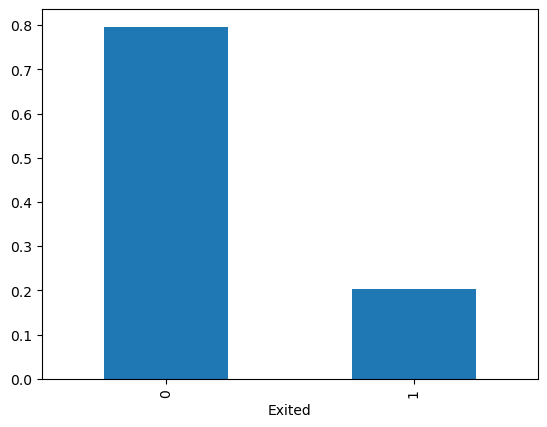

In [50]:
churn_data['Exited'].value_counts(normalize = True).plot.bar()

### Explore the categorical variables vs. the target, and look at the percentage of Churners by “Geography” and “Gender”

Build box plots for each numeric field, broken out by churners vs. non-churners

Build histograms for each numeric field, broken out by churners vs. non-churners

Create a new dataset that excludes any columns that aren’t be suitable for modeling

In [69]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0
6,15574012,Chu,645,Spain,Male,44.0,8,149756.71,113755.78,2,No,No,1


In [73]:
modelling_df = churn_data.drop(['CustomerId','Surname'],axis = 1)

In [75]:
modelling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0
6,645,Spain,Male,44.0,8,149756.71,113755.78,2,No,No,1


Create dummy variables for categorical fields

In [78]:
modelling_df = pd.get_dummies(data = modelling_df,drop_first = True )

In [82]:
modelling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_France,Geography_French,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
2,608,41.0,1,112542.58,83807.86,1,0,False,False,False,True,False,True,True
3,502,42.0,8,113931.57,159660.80,3,1,False,True,False,False,False,False,False
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False,False,False
5,850,43.0,2,79084.10,125510.82,1,0,False,False,False,True,False,True,True
6,645,44.0,8,149756.71,113755.78,2,1,False,False,False,True,True,False,False


## Create a new “balance_v_income” feature, which divides a customer’s bank balance by their estimated salary, then visualize that feature vs. churn status

In [88]:
modelling_df['balance_v_income'] = modelling_df['Balance'] / modelling_df['EstimatedSalary']

In [90]:
modelling_df.head(2)

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_France,Geography_French,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,balance_v_income
2,608,41.0,1,112542.58,83807.86,1,0,False,False,False,True,False,True,True,0.744677
3,502,42.0,8,113931.57,159660.80,3,1,False,True,False,False,False,False,False,1.401375


<Axes: ylabel='balance_v_income'>

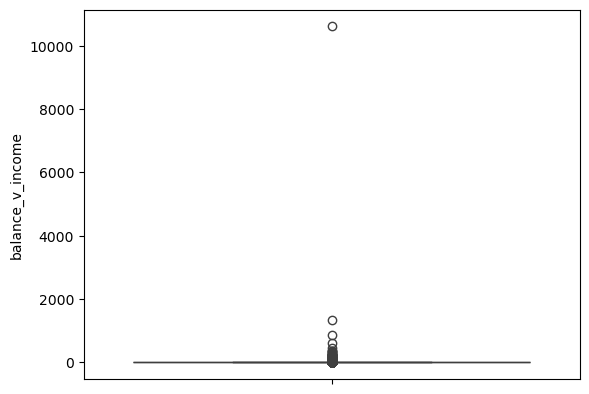

In [98]:
import seaborn as sns
sns.boxplot(modelling_df, y = 'balance_v_income' )